In [24]:
using JLD
using PyPlot
using Statistics, StatsBase #mean and std

In [74]:
nombrecm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
archivo=load(nombrecm)
DatosCMP=archivo["CMP"]
DatosCMN=archivo["CMN"];
evocada=false
nmax=length(DatosCMP) #cuantos cuadros hay

2000

In [43]:
DatosCMP[1337]

1×3 Array{Float64,2}:
 41.5876  64.0  103.379

In [44]:
DatosCMP[1341]

0×3 Array{Int64,2}

In [45]:
function leeunmegaarrayarchivos(NomineGeneralis::AbstractString, desde=35, hasta=501)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
            readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
    end


function leunjlddeCM(datos, desde=1, hasta=300)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
        readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
end



leunjlddeCM (generic function with 3 methods)

Para Evocados, hay un par de variables temporales para considerar:
- retrazo: el tiempo en cuadros que hubo desde el comienzo del registro hasta el estimulo
- latencia: el tiempo en cuadros que hubo desde el estimulo hasta que paso algo interesante


In [46]:
freq=7.022 # la frecuencia de muestreo en kHz de los experimentos viejos

if evocada
    retms=5.0 #retrazo en milisec
    latms=4.0 #latencia en milisec
    retrazo=round(Int, retms * freq)
    lat=round(Int, latms * freq)
    desde=retrazo+lat
    hasta=300
else
    retms=0
    latms=0
    retrazo=0
    lat=0
    desde=1
    hasta=nmax
end

2000

In [47]:
function dist2D(x,y)
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end

function difgordis(x,y)
    result=abs(x-y)/max(abs(x),abs(y))
    return result
end

difgordis (generic function with 1 method)

In [48]:
difgordis(0.21,0.29)

0.27586206896551724

In [49]:
function encuentraTrayectorias(Datos, mincadena=20, mingordo=2.0, desde=1,hasta=20)

toleradist=16.0*sqrt(2)
#toldifgordis=0.33
tau=1
t=1
j=1

Catenario=Dict{Integer, Array{Any}}()
Cadena=[0 0 0 0]
tnum=1
CopiaMegaArray=deepcopy(Datos);
NumFrames=length(Datos)
FakeNumFrames=NumFrames



while t <= FakeNumFrames-1 
    
    tau=t
    
    @label arrrrh
 
        if(CopiaMegaArray[tau]==[])
            
            jmax,nada=0,0
        else
          
     jmax,nada= size(CopiaMegaArray[tau])
        end
    
        
    while j <=jmax && tau<FakeNumFrames
            
            if abs(CopiaMegaArray[tau][j,3]) > mingordo
                
            Eslabon=[transpose(CopiaMegaArray[tau][j,:]) tau]
            Cadena=vcat(Cadena, Eslabon)
         #   println("Papa t: ", t, "  tau: ", tau, " y  j: ",j )
            mindist=2
            kasterisco=1
                
                if CopiaMegaArray[tau+1]==[]
                    kmax,nada=0,0
                else
                kmax, nada= size(CopiaMegaArray[tau+1])
                end
                huboalgo=false
          
        #    kmax=5
            
            for k=1:kmax
                
                EslabonTentativo=CopiaMegaArray[tau+1][k,:]
            #    println(EslabonTentativo)
                    if abs(EslabonTentativo[3])>mingordo
                    dist=dist2D(Eslabon,EslabonTentativo)                  
                    if dist<mindist
                        mindist=dist
                        kasterisco=k
                        
                       # println(kasterisco, "=k*", k, "=k")
                        huboalgo=true
                    end
                end
            
            end    
            
            if huboalgo && mindist<toleradist
                #quitamos el anterior
                CopiaMegaArray[tau][j,3]=0.0000 
               # println(mindist," ", t, " ", tau+1 ," ", kasterisco )
                
                if tau+1<FakeNumFrames
                    tau+=1
                    j=kasterisco
      #              println("Pepe t: ", t, "  tau: ", tau, " y  j: ",j )
                    @goto arrrrh
                
                else
                    
                    Eslabon=[transpose(CopiaMegaArray[tau+1][kasterisco,:]) tau+1]
                    Cadena=vcat(Cadena, Eslabon)
      #              println("Pipi t: ", t, "  t: ", t, " y  j: ",j )
                    j+=1
                    tau=t
                    
                    if size(Cadena)[1]>mincadena
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                    end
                    
                    Cadena=[0 0 0 0]
                    @goto arrrrh
                end
                                
            else
                
                if size(Cadena)[1]>mincadena
                    # veamos si funciona  mejor como dict 
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                end
                Cadena=[0 0 0 0]
                j+=1
                tau=t
                @goto arrrrh
            end
                       
        end #cierra sobre el if de  la masa 
                
        j+=1                    
        tau=t
    
    end
    @label urrr
      
    j=1
    t+=1
    tau=t
    Cadena=[0 0 0 0]
        end 
    
    return Catenario
end

encuentraTrayectorias (generic function with 5 methods)

In [50]:
(desde, hasta)


(1, 2000)

In [51]:
pesomin=1
longmin=3

3

In [75]:
#Recuerda el segundo argumento es la longitud mínima de la cadena
@time CatenarioPositivo=encuentraTrayectorias(DatosCMP,longmin,pesomin,desde,hasta);


  0.249057 seconds (1.39 M allocations: 55.202 MiB, 13.87% gc time)


In [76]:
CatenarioNegativo=encuentraTrayectorias(DatosCMN,longmin,pesomin,desde,hasta);

In [77]:
nombreout=nombrecm[1:end-6]*"Tray-todas.jld"
nota="longitud minima fue $longmin, peso minimo fue $pesomin "
#save(nombreout, "CatenarioNegativo", CatenarioNegativo, "CatenarioPositivo", CatenarioPositivo, "nota", nota)

"longitud minima fue 3, peso minimo fue 1 "

In [78]:
length(CatenarioPositivo), length(CatenarioNegativo)

(1070, 1265)

In [79]:
CatenarioPositivo

Dict{Integer,Array{Any,N} where N} with 1070 entries:
  306 => Any[54.7934 46.2446 57.8017 669.0; 54.9773 46.3887 69.193 670.0; … ; 5…
  29  => Any[56.5572 5.61218 50.3324 425.0; 56.547 5.61383 52.9577 426.0; 56.56…
  74  => Any[41.2134 41.2001 100.945 547.0; 41.2236 41.1742 107.402 548.0; 41.2…
  905 => Any[30.2161 46.2833 96.1865 1193.0; 30.1594 46.3593 77.8674 1194.0; … …
  176 => Any[43.5144 47.0999 493.733 589.0; 42.0603 46.1493 590.902 590.0; … ; …
  892 => Any[31.2194 48.4178 215.487 1184.0; 31.8662 49.4608 173.656 1185.0; 32…
  285 => Any[43.4874 9.30992 65.2904 654.0; 43.787 9.17024 56.6216 655.0; … ; 4…
  318 => Any[63.0045 42.4594 45.3901 676.0; 62.9753 42.4265 46.5355 677.0; … ; …
  873 => Any[52.6738 24.1347 67.4742 1164.0; 52.7202 24.2124 50.0291 1165.0; 52…
  975 => Any[23.7725 53.7603 55.5763 1255.0; 23.4903 53.485 49.3998 1256.0; 23.…
  354 => Any[56.9026 26.3334 81.9413 705.0; 56.8365 25.9576 104.071 706.0; … ; …
  610 => Any[30.3511 5.74885 74.4498 919.0; 30.3596 5.6

In [80]:
nombreout

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-Tray-todas.jld"

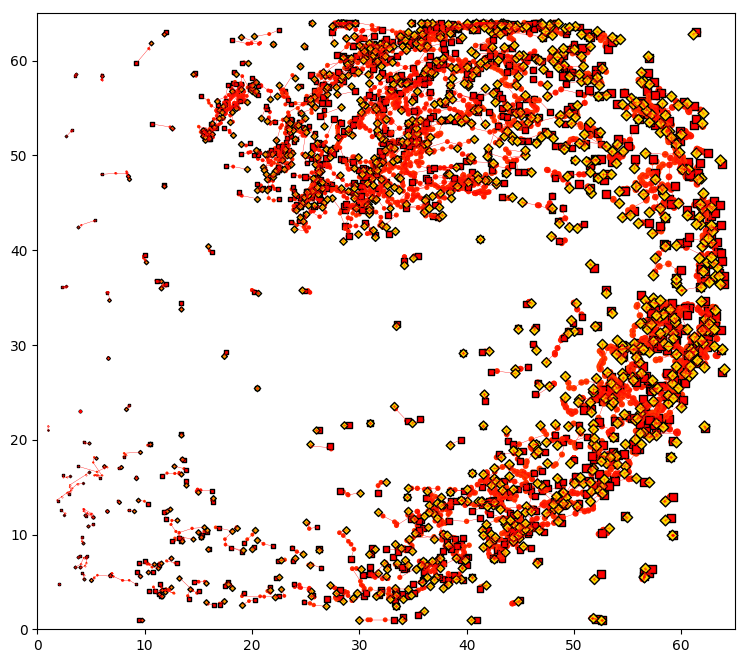

In [81]:
#PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
tolerancia=0
minlong=0
maxlong=20000
#colores=Union{}

for p in values(CatenarioPositivo)
    gordura=abs(p[:3])
    longus,gordus=size(p)
    if (mean(gordura)>tolerancia) && (longus>minlong) && longus < maxlong
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=0.25, color="r", lw=0.25, zorder=15)
        colores=scatter(xxpos,yypos, s=gordura*0.4, edgecolors="none", 
        c=tiempos, cmap="autumn", vmin=0.0, vmax=0.72 )
        principios=scatter(xxpos[1],yypos[1], s=gordura*0.5,
        edgecolors="black", 
        color="r", marker="s", label="Inicio" ,
        zorder=1)
        finales=scatter(xxpos[end],yypos[end], s=gordura*0.5, edgecolors="black", 
        color="gold", marker="D", label="Final", zorder=2 )
        # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#savefig("ejemploaltaspositivas-01.svg",dpi=92)

In [82]:
values(CatenarioNegativo)

Base.ValueIterator for a Dict{Integer,Array{Any,N} where N} with 1265 entries. Values:
  Any[19.5722 56.3654 -46.0778 648.0; 19.8067 55.5478 -56.6774 649.0; … ; 18.25…
  Any[12.7814 13.2191 -103.834 1283.0; 13.3355 13.0147 -100.899 1284.0; 14.6304…
  Any[60.9992 27.2412 -39.6101 255.0; 61.0581 27.2407 -48.0373 256.0; 61.479 27…
  Any[14.1397 19.1614 -69.4481 1334.0; 13.4955 19.1492 -73.8696 1335.0; 13.519 …
  Any[27.6762 59.776 -48.2529 542.0; 27.7334 59.7668 -64.8125 543.0; … ; 29.288…
  Any[12.678 37.0 -48.458 1998.0; 12.5608 37.0 -48.284 1999.0; 12.4539 37.0 -44…
  Any[51.4997 29.5622 -50.4789 1102.0; 51.4802 29.5186 -60.5645 1103.0; 51.4574…
  Any[34.0639 62.2018 -380.175 561.0; 34.1787 62.2658 -404.442 562.0; … ; 34.93…
  Any[14.006 6.20632 -44.224 1091.0; 13.969 6.22655 -46.7916 1092.0; 13.2079 6.…
  Any[57.7528 57.7207 -105.721 637.0; 57.8781 57.5703 -144.857 638.0; 58.2797 5…
  Any[53.3401 61.6985 -294.346 652.0; 53.7525 61.7223 -306.693 653.0; … ; 53.71…
  Any[39.208 59.5485 -

In [83]:
save(nombreout, "CatenarioPositivo", CatenarioPositivo, "CatenarioNegativo", CatenarioNegativo, "notatray", nota)